
### 1. (10 pontos) No exercício, você deverá mostrar:
- As bibliotecas necessárias para realizar a atividade
- mostre as primeiras cinco linhas do dataframe
- mostre as dimensões do dataFrame (quantas linhas e colunas)
- mostre os tipos de dados das colunas
- mostre os nomes das colunas


#### Bibliotecas necessárias:

In [ ]:
!pip install bokeh_sampledata
from bokeh.sampledata.iris import flowers as data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 17.0 MB/s eta 0:00:00


#### Primeiras cinco linhas:

In [ ]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Dimensões:

In [ ]:
data.shape

(150, 5)

#### Tipos de dados:

In [ ]:
data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


#### Nomes das colunas:

In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### 2. (5 pontos) Exiba um resumo das principais estatísticas do banco de dados.

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 3. (5 pontos) Exiba a frequência absoluta das espécies (total, não é necessário fazer gráfico).

In [ ]:
data[['species']].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


### 4. (5 pontos) Exiba a frequência relativa das espécies (total, não é necessário fazer gráfico).

In [ ]:
data[['species']].value_counts(normalize=True)

,proportion
species,
setosa,0.333333
versicolor,0.333333
virginica,0.333333


### 5. (10 pontos) Exiba um gráfico de barras (verticais), mostrando o total por espécies.

Obs: Eu não entendi muito bem o comando da questão, se é para mostrar o total por característica ou simplesmente o total, já que este deixaria o código repetitivo (significaria repetir as questões 3 e 4 nas 5 e 6, porém em formato de gráficos).

Resolvi criar 2 gráficos para responder ambas as interpretações.

In [ ]:
data_grouped = data.groupby('species').sum()
data_grouped = data_grouped.reset_index()

data_melted = pd.melt(data_grouped,
                      id_vars=['species'],
                      value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

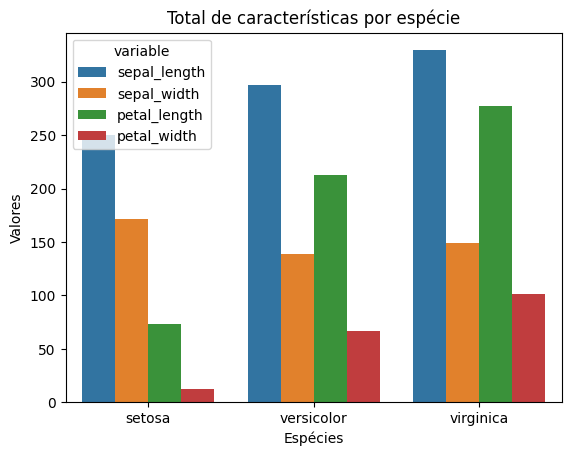

In [ ]:
ax = sns.barplot(data=data_melted,
                  x='species',
                  y='value',
                  hue='variable')
ax.set_title("Total de características por espécie")
ax.set_xlabel('Espécies')
ax.set_ylabel('Valores');

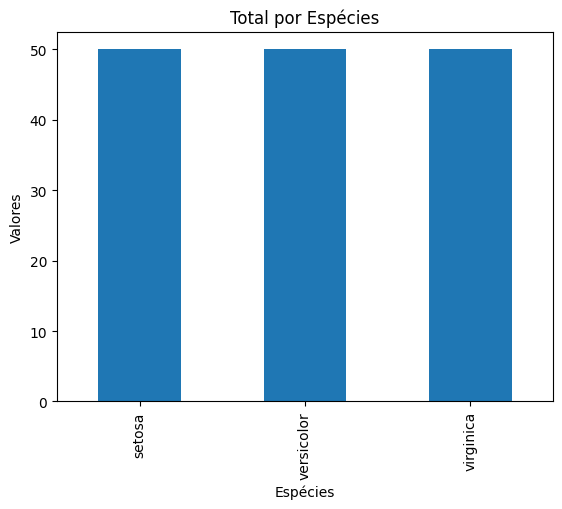

In [ ]:
data['species'].value_counts().plot(kind='bar', title='Total por Espécies')
plt.xlabel('Espécies')
plt.ylabel('Valores');

###6. (10 pontos) Exiba um gráfico de colunas (horizontais), mostrando o total por espécies.

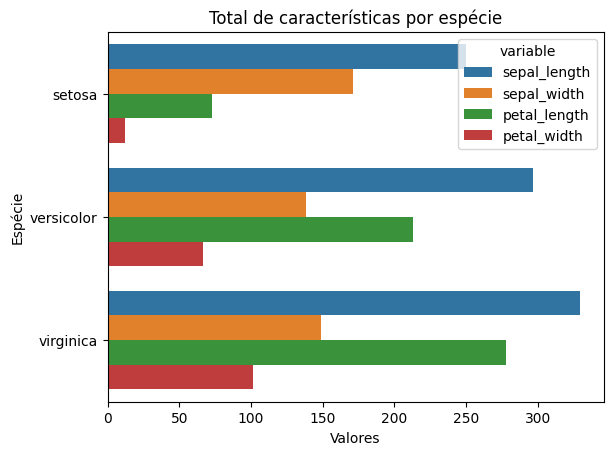

In [ ]:
ax = sns.barplot(data=data_melted,
                 x='value',
                 y='species',
                 hue='variable',
                 orient='h')
ax.set_title("Total de características por espécie")
ax.set_xlabel('Valores')
ax.set_ylabel('Espécie');

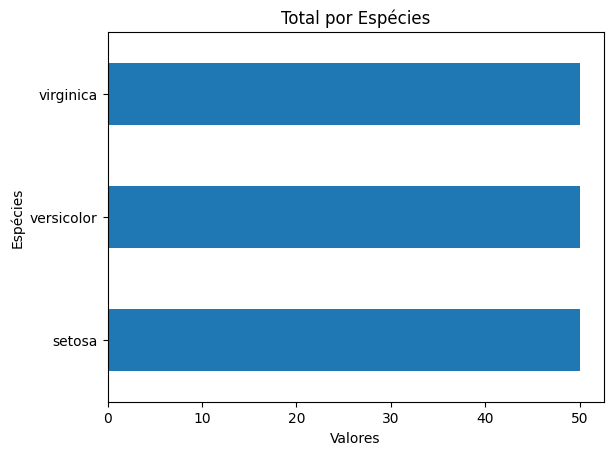

In [ ]:
data['species'].value_counts().plot(kind='barh', title='Total por Espécies')
plt.xlabel('Valores')
plt.ylabel('Espécies');

### 7. (15 pontos) Exiba bloxplot do dataset (mostrando de todas as colunas, por espécies).

In [ ]:
ax = px.box(data, y = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], color='species')
ax.update_layout(title = 'Variações de sépala e pétala para cada espécie', width = 900)

### 8. (10 pontos) Calcule a média e mediana agrupadas por espécies.

In [ ]:
data.groupby('species').agg(['mean', 'sum']).reset_index()

species sepal_length        sepal_width        petal_length         \
                      mean    sum        mean    sum         mean    sum   
0      setosa        5.006  250.3       3.428  171.4        1.462   73.1   
1  versicolor        5.936  296.8       2.770  138.5        4.260  213.0   
2   virginica        6.588  329.4       2.974  148.7        5.552  277.6   

  petal_width         
         mean    sum  
0       0.246   12.3  
1       1.326   66.3  
2       2.026  101.3

### 9. (10 pontos) Calcule o desvio padrão e a variância agrupadas por espécies.

In [ ]:
data.groupby('species').agg(['std', 'var']).reset_index()

species sepal_length           sepal_width           petal_length  \
                       std       var         std       var          std   
0      setosa     0.352490  0.124249    0.379064  0.143690     0.173664   
1  versicolor     0.516171  0.266433    0.313798  0.098469     0.469911   
2   virginica     0.635880  0.404343    0.322497  0.104004     0.551895   

            petal_width            
        var         std       var  
0  0.030159    0.105386  0.011106  
1  0.220816    0.197753  0.039106  
2  0.304588    0.274650  0.075433

### 10. (20 pontos) Escreva um parágrafo de no máximo 5 linhas analisando os resultados, considerando os itens 3, 4, 8, 9 e o que você observou no boxplot.

Os dados de cada espécie estão igualmente distruídos no dataset, com 50 observações para cada uma. A espécie Virginica possui os maiores comprimentos no geral, perdendo apenas para a Setosa na largura da pétala. Em relação à dispersão, a espécie virginica possui os maiores lavores em comparação com as demais, levando em conta os valores de 'std' e a amplitude de suas caixas no gráfico boxplot.